# Challenge description:

Using this csv (checkout1) and using this csv (checkout2) with hypothetical checkout data, imagine that you are trying to understand if there is any kind of anomaly behavior.

1. Analyze the data provided and present your conclusions.
2. In addition to the spreadsheet data, make a query in SQL and make a graphic of it and try to explain the anomaly behavior you found.
3. In this csv you have the **number of sales of POS by hour** comparing the same sales per hour from today, yesterday and the average of other days. So with this we can see the behavior from today and compare to other days

In this csv you have the number of sales of POS by hour comparing the same sales per hour from today, yesterday and the average of other days. So with this we can see the behavior from today and compare to other days.

**From Google AI-powered Converse**:

A point of sale (POS) hourly sales report shows sales activity for each hour of the previous 24 hours. The report might include: 
    1. Total sales
    2. Number of items sold or refunded
    3. Number of transactions
    4. The POS Hourly Sales Report can help businesses understand their busiest operating times. It can also save businesses money

**Da internet**:

PDV (em ingles POS) é sigla para ponto de venda, que é o espaço (físico ou online) em que ocorrem as vendas de produtos ou serviços das empresas aos clientes.

O PDV pode se referir à loja física ou virtual, quiosques, marketplaces, supermercados e outros ambientes em que se efetuam as vendas. Nesses locais, os produtos ou serviços são apresentados aos clientes, que escolhem o que vão comprar e finalizam o pagamento no caixa da loja ou no checkout do e-commerce.

<hr style="border:2px solid gray">

To do this challenge, I did most of the work using Python. However, it is requested by the problem that I write a SQL query. 

Therefore, I wrote some queries to find out the time of maximum variation in the number of sales for each datasets. Here is the proof:
    
**For checkout_1**:

<div style="display: inline-block;">
    <img src="sqlimages/image_a.png" width="500" alt="Image 1">
</div>

**For checkout_2**:

<div style="display: inline-block;">
    <img src="sqlimages/image_b.png" width="500" alt="Image 2">
</div>

<hr style="border:2px solid gray">

# Importing Modules

In [1]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec

from IPython.display import display, HTML

In [18]:
# Adjust the width of the display container to 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

# Set the font size for rendered HTML to 17px
display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))

# Load datasets

In [3]:
# Read data from CSV files into Pandas DataFrames for checkout_1 and checkout_2
checkout_1_df = pd.read_csv('checkout_datasets/checkout_1.csv')
checkout_2_df = pd.read_csv('checkout_datasets/checkout_2.csv')

In [4]:
# Display information about the structure and data types of the checkout dataframes 
print(checkout_1_df.info(), '\n')
print(checkout_2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_last_week       24 non-null     float64
 5   avg_last_month      24 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                24 non-null     object 
 1   today               24 non-null     int64  
 2   yesterday           24 non-null     int64  
 3   same_day_last_week  24 non-null     int64  
 4   avg_last_week       24 non-null     

In [5]:
# Convert the 'time' column from string format to a proper time format
checkout_1_df['time'] = checkout_1_df.time.apply(lambda x: x.replace('h', ''))
checkout_1_df['time'] = pd.to_datetime(checkout_1_df['time'], format = '%H').dt.time

checkout_2_df['time'] = checkout_2_df.time.apply(lambda x: x.replace('h', ''))
checkout_2_df['time'] = pd.to_datetime(checkout_2_df['time'], format = '%H').dt.time

# Exploratory Data Analysis 

In [6]:
# Display descriptive statistics for the checkout dataframes
print(checkout_1_df.describe(), '\n')
print(checkout_2_df.describe(), '\n')

           today  yesterday  same_day_last_week  avg_last_week  avg_last_month
count  24.000000  24.000000           24.000000      24.000000       24.000000
mean   21.916667  21.791667           23.833333      15.482917       14.630833
std    19.410702  17.222279           17.239153      11.106122       10.366863
min     0.000000   0.000000            0.000000       0.280000        0.210000
25%     1.750000   2.500000            8.000000       4.890000        4.207500
50%    26.500000  26.500000           27.000000      18.065000       17.925000
75%    36.000000  35.250000           38.250000      25.922500       24.460000
max    55.000000  51.000000           49.000000      33.710000       28.500000 

           today  yesterday  same_day_last_week  avg_last_week  avg_last_month
count  24.000000  24.000000           24.000000      24.000000       24.000000
mean   17.791667  21.916667           20.333333      11.936958       14.525417
std    16.699334  19.410702           15.813221   

In [7]:
# Display the first 5 rows of the dataframe
checkout_1_df.head(5)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00:00:00,9,12,11,6.42,4.85
1,01:00:00,3,5,1,1.85,1.92
2,02:00:00,1,0,0,0.28,0.82
3,03:00:00,1,0,0,0.42,0.46
4,04:00:00,0,0,1,0.42,0.21


In [8]:
# Display the first 5 rows of the dataframe
checkout_2_df.head(5)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00:00:00,6,9,5,5.00,4.92
1,01:00:00,3,3,2,2.00,1.92
2,02:00:00,3,1,2,0.42,0.75
3,03:00:00,0,1,1,0.42,0.46
4,04:00:00,0,0,0,0.14,0.21


For each dataset ("Checkout 1" and "Checkout 2"), I'll plot the number of sales/hour and the change in number of sales/hour.

My goal is to look for any spikes or dips in today's sales compared to the other days and the averages.

Anomalies could indicate issues or exceptional events affecting sales.

In [9]:
# Calculate the difference in the number of sales from one hour to the next using the pandas diff() method
diff_checkout_1_df = checkout_1_df[checkout_1_df.columns[1:]].diff(1)
diff_checkout_2_df = checkout_2_df[checkout_2_df.columns[1:]].diff(1)

# Replace NaN with 0 for the first row in the diff DataFrame
diff_checkout_1_df.iloc[0] = 0
diff_checkout_2_df.iloc[0] = 0

# Insert the 'time' column back into the DataFrame 
diff_checkout_1_df.insert(0, 'time', checkout_1_df['time'])
diff_checkout_2_df.insert(0, 'time', checkout_2_df['time'])

In [10]:
# Define colors for use in plots
# today (red)
# yesterday (blue) 
# same_day_last_week (green)
# avg_last_week (purple)
# avg_last_month (orange)
colors_checkout = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

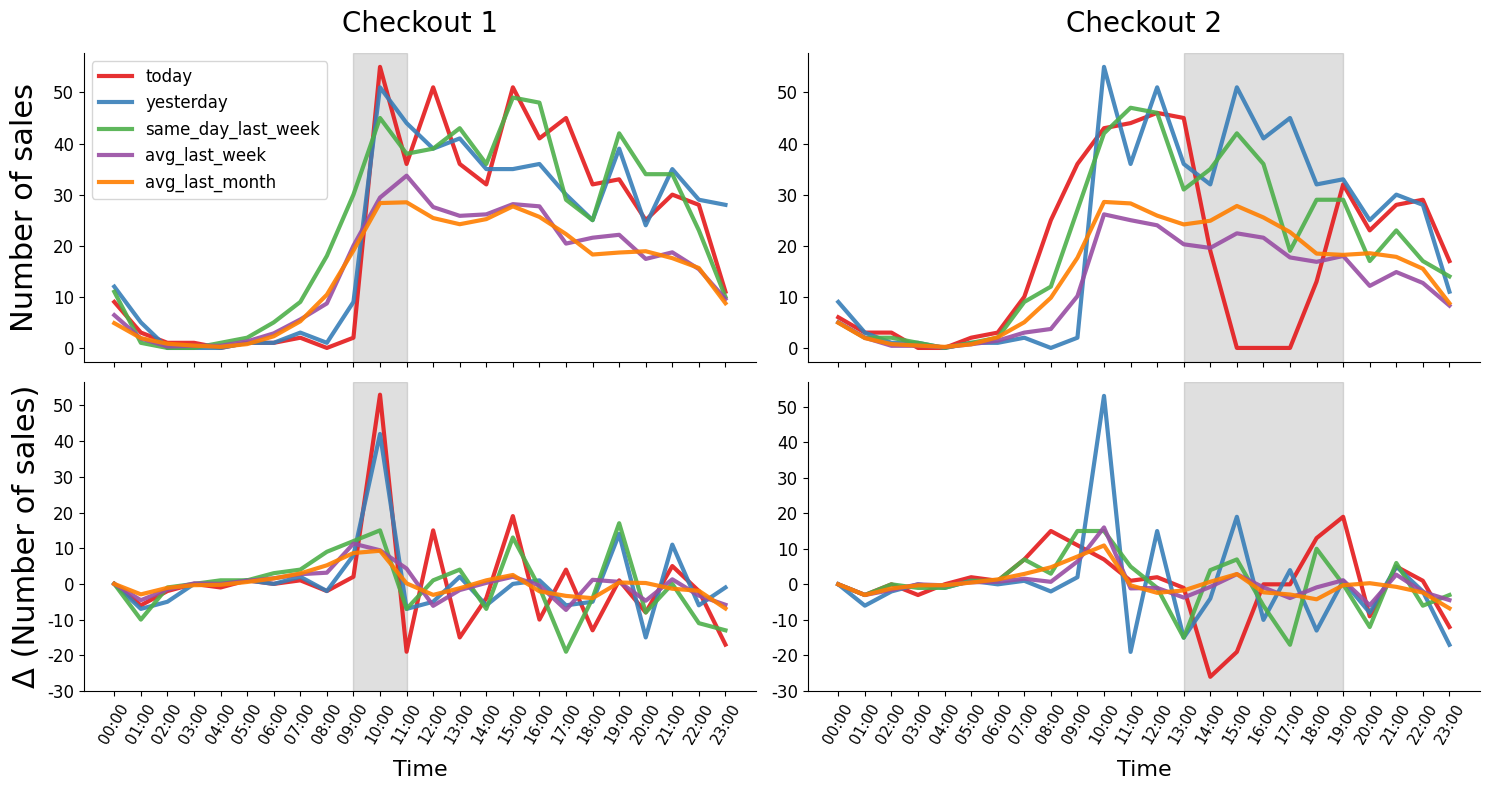

In [19]:
# Create subplots to visualize the number of sales data and the hourly difference 
f, ax = plt.subplots(figsize=(15, 8), nrows=2, ncols=2)

# Plot the sales data for Checkout 1
checkout_1_df.plot(x='time', ax=ax[0][0], linewidth=3, alpha=0.9, color=colors_checkout, legend=True)
# Add legend to the upper-left corner
ax[0][0].legend(loc='upper left', fontsize=12)

# Set title for the subplot
ax[0][0].set_title('Checkout 1', fontsize=20, pad=15)

# Plot the sales data for Checkout 2
checkout_2_df.plot(x='time', ax=ax[0][1], linewidth=3, alpha=0.9, color=colors_checkout, legend=False)

# Plot the difference in sales data for Checkout 1
diff_checkout_1_df.plot(x='time', ax=ax[1][0], linewidth=3, alpha=0.9, color=colors_checkout, legend=False)
# Set title for the subplot
ax[0][1].set_title('Checkout 2', fontsize=20, pad=15)

# Plot the difference in sales data for Checkout 2
diff_checkout_2_df.plot(x='time', ax=ax[1][1], linewidth=3, alpha=0.9, color=colors_checkout, legend=False)

# Customize tick labels, spines, and axes for each subplot
for i in range(2):
    for j in range(2):
        # Format x-axis tick labels
        xticklabels = [str(x)[:-3] for x in checkout_1_df['time']]
        ax[i][j].set_xticks(checkout_1_df['time'].values)
        ax[i][j].set_xticklabels(xticklabels, rotation=60, fontsize=11)

        # Hide top and right spines
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)

# Set y-axis labels for the specified subplots
ax[0][0].set_ylabel('Number of sales', fontsize=22, labelpad=10)
ax[1][0].set_ylabel(u'Δ (Number of sales)', fontsize=22)

# Highlight specific time intervals with shaded regions
ax[0][0].axvspan(checkout_1_df['time'][9], checkout_1_df['time'][11], color='#606060', alpha=0.2)
ax[1][0].axvspan(checkout_1_df['time'][9], checkout_1_df['time'][11], color='#606060', alpha=0.2)
ax[0][1].axvspan(checkout_1_df['time'][13], checkout_1_df['time'][19], color='#606060', alpha=0.2)
ax[1][1].axvspan(checkout_1_df['time'][13], checkout_1_df['time'][19], color='#606060', alpha=0.2)

# Customize y-axis ticks and labels for specific subplots
for i in range(2):
    ax[0][i].set_yticks(np.arange(0, 60, 10))
    ax[0][i].set_yticklabels(np.arange(0, 60, 10), fontsize=12)

    ax[1][i].set_yticks(np.arange(-30, 60, 10))
    ax[1][i].set_yticklabels(np.arange(-30, 60, 10), fontsize=12)

# Remove x-axis tick labels for specific subplots
ax[0][0].set_xticklabels([])
ax[0][1].set_xticklabels([])

# Remove x-axis label for specific subplots
ax[0][0].set_xlabel('')
ax[0][1].set_xlabel('')

# Set x-axis label and adjust layout
ax[1][0].set_xlabel('Time', fontsize=16, labelpad=10)
ax[1][1].set_xlabel('Time', fontsize=16, labelpad=10)

# Adjust layout for better visualization
f.tight_layout()

# Display the plot
plt.show()

**For Checkout 1:**
    
1. The visualizations show a rising trend until 10:00 am, peaking around that time.

2. The curves (same_day_last_week, avg_last_week, avg_last_month) exhibit a smooth change between 9:00 and 10:00 hours. However, today's (and yesterday's) curve displays a significant fluctuation during this period. 
    
**For Checkout 2:**
    
1. The visualizations also show a rising trend until 10:00 am, peaking around that time.

2. Here today's curve display significant changes in the 13:00-19:00 interval. Specifically, it drops to a low value and then it gets back. This looks very different compared to the others curves around that time.  
    
For both checkouts, let's create individual plots for each curve to observe their independent behaviors.

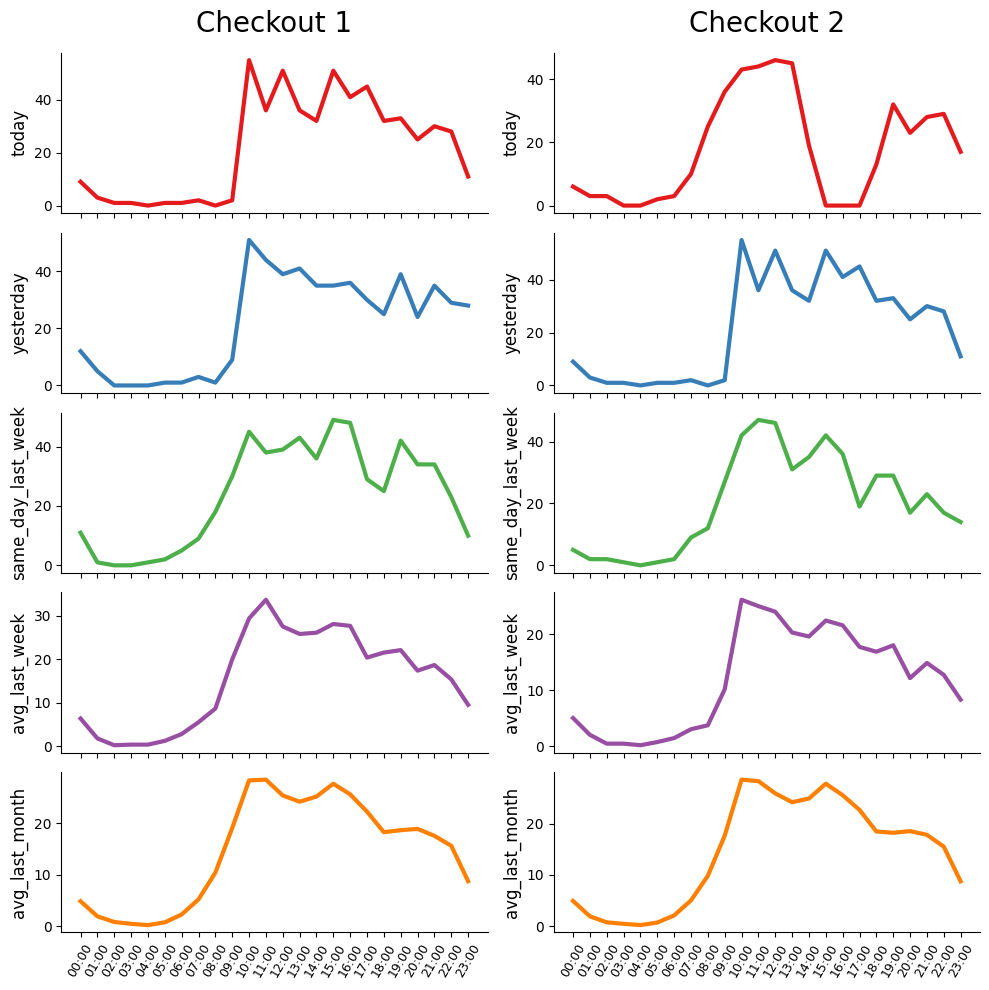

In [12]:
f, ax = plt.subplots(figsize = (10, 10), nrows = 5, ncols = 2)

for num, column in enumerate(checkout_1_df.columns[1:]):
    ax[num][0].plot(np.arange(len(checkout_1_df)), checkout_1_df[column].values, linewidth = 3, color = colors_checkout[num])
    
    ax[num][0].set_ylabel(column, fontsize = 12)
    ax[num][0].spines['top'].set_visible(False)
    ax[num][0].spines['right'].set_visible(False)
    
    ax[num][0].set_xticks(np.arange(len(checkout_1_df)))
    ax[num][0].set_xticklabels([])

ax[num][0].set_xticks(np.arange(len(checkout_1_df)))
ax[num][0].set_xticklabels([str(x)[:-3] for x in checkout_1_df['time']], rotation=60, fontsize = 9)

ax[0][0].set_title('Checkout 1', fontsize=20, pad = 15)
ax[0][1].set_title('Checkout 2', fontsize=20, pad = 15)

for num, column in enumerate(checkout_2_df.columns[1:]):
    ax[num][1].plot(np.arange(len(checkout_2_df)), checkout_2_df[column].values, linewidth = 3, color = colors_checkout[num])
    
    ax[num][1].set_ylabel(column, fontsize = 12)
    ax[num][1].spines['top'].set_visible(False)
    ax[num][1].spines['right'].set_visible(False)
    
    ax[num][1].set_xticks(np.arange(len(checkout_2_df)))
    ax[num][1].set_xticklabels([])
    
ax[num][1].set_xticks(np.arange(len(checkout_2_df)))
ax[num][1].set_xticklabels([str(x)[:-3] for x in checkout_2_df['time']], rotation=60, fontsize = 9)

f.tight_layout()
plt.show()

Considering the overall trends, it is reasonable to say that there are two main peaks in these datasets: one occurring around 10 am (usually the biggest) and another around 3 pm (slightly smaller).

However, if we look at the red curves (todays), what looks strange here is:

1. **For checkout 1, today's curve changes too rapidly between 9 and 10am.**
2. **For checkout 2, today's curve exhibit a different behavior between 13:00 and 19:00 where it drops to a very low value.**

In [21]:
np.all(checkout_1_df['today'] ==  checkout_2_df['yesterday'])

True

Looking at these graphs, I noticed that the checkout 2 curve (for yesterday) is exactly the same as the checkout 1 curve (for today).

Therefore, we might have something like:

 Checkout_1: day t
 
 Checkout_2: day t + 1 day

In [14]:
# These curves look very similar, but they are not exactly the same.
np.all(checkout_1_df['avg_last_month'] ==  checkout_2_df['avg_last_month']) 

False